In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import casadi as ca
from pytope import Polytope
from matplotlib.animation import FuncAnimation
from tqdm import tqdm

In [54]:
data_id = "08"
track_id  = 18

background_filepath = f"../../data/{data_id}_background.png"
recordingMeta_filepath = f"../../data/{data_id}_recordingMeta.csv"
tracks_filepath = f"../../data/{data_id}_tracks.csv"
tracksMeta_filepath = f"../../data/{data_id}_tracksMeta.csv"

tracks_data = pd.read_csv(tracks_filepath)
filtered_data = tracks_data[tracks_data['trackId'] == track_id]

xAcc = filtered_data['xAcceleration'].to_numpy()
yAcc = filtered_data['yAcceleration'].to_numpy()
acc_vals= np.vstack((xAcc,yAcc))
N_Sam = acc_vals.shape[1]

xPos = filtered_data["xCenter"].to_numpy()
yPos = filtered_data["yCenter"].to_numpy()
position_vals = np.vstack((xPos,yPos))

SV_x = xPos
SV_y = yPos

xVel = filtered_data["xVelocity"].to_numpy()
yVel = filtered_data["yVelocity"].to_numpy()
velocity_vals = np.vstack((xVel,yVel))

yaw = filtered_data["heading"].to_numpy()

recordingMeta = pd.read_csv(recordingMeta_filepath)
orthoPxToMeter = recordingMeta["orthoPxToMeter"].iloc[0]

vehicle_data = pd.read_csv(tracksMeta_filepath)
filtered_vehicle_param = vehicle_data[vehicle_data['trackId'] == track_id]
sv_width = filtered_vehicle_param["width"]
sv_length = filtered_vehicle_param["length"]

print(tracks_data[(tracks_data['trackId'] == track_id) & (tracks_data['trackLifetime'] == 0)]['xAcceleration'].to_numpy())

[-0.59471]


In [55]:
def gen_drive_area(vertices):
    Drive_Area = Polytope(vertices*(0.00814636091724916*12))
    Drive_Area_visual = Polytope(vertices)
    A_road = Drive_Area.A
    b_road = Drive_Area.b
    return Drive_Area, Drive_Area_visual, A_road, b_road

# EV 1
road_vertices_1 = np.array([
    [294, -59],
    [590, -388],
    [731, -221],
    [473, 88],
])

not_road_vertices_1 = [
    np.array([
        [303, -30],
        [548, -290],
        [701, -151],
        [473, 88]
     ]),
]

Drive_Area_1, Drive_Area_visual_1, A_road_1, b_road_1 = gen_drive_area(road_vertices_1)
not_Drive_Area_1 = []
not_Drive_Area_visual_1 = []
not_A_road_1 = []
not_b_road_1 = []
for i in range(len(not_road_vertices_1)):
    tmp1, tmp2, tmp3, tmp4 = gen_drive_area(not_road_vertices_1[i])
    not_Drive_Area_1.append(tmp1)
    not_Drive_Area_visual_1.append(tmp2)
    not_A_road_1.append(tmp3)
    not_b_road_1.append(tmp4)

# EV 2
road_vertices_2 = np.array([
    [306, -32],
    [842, -623],
    [877, -608],
    [333, -4],
])

not_road_vertices_2 = [
    np.array([
        [0, 1],
        [1, 1],
        [1, 0],
        [0, 0]
     ]),
]

# road_vertices_2 = np.array([
#     [850, -628],
#     [549, -300],
#     [381, -481],
#     [654, -774],
# ])

# not_road_vertices_2 = [
#     np.array([
#         [821, -639],
#         [603, -400],
#         [442, -543],
#         [649, -759]
#      ]),
# ]

Drive_Area_2, Drive_Area_visual_2, A_road_2, b_road_2 = gen_drive_area(road_vertices_2)
not_Drive_Area_2 = []
not_Drive_Area_visual_2 = []
not_A_road_2 = []
not_b_road_2 = []
for i in range(len(not_road_vertices_2)):
    tmp1, tmp2, tmp3, tmp4 = gen_drive_area(not_road_vertices_2[i])
    not_Drive_Area_2.append(tmp1)
    not_Drive_Area_visual_2.append(tmp2)
    not_A_road_2.append(tmp3)
    not_b_road_2.append(tmp4)

# EV 3
road_vertices_3 = np.array([
    [684, -152],
    [487, -318],
    [805, -670],
    [1000, -450],
])

not_road_vertices_3 = [
    np.array([
        [741, -200],
        [598, -387],
        [834, -649],
        [1000, -450]
     ]),
]

Drive_Area_3, Drive_Area_visual_3, A_road_3, b_road_3 = gen_drive_area(road_vertices_3)
not_Drive_Area_3 = []
not_Drive_Area_visual_3 = []
not_A_road_3 = []
not_b_road_3 = []
for i in range(len(not_road_vertices_3)):
    tmp1, tmp2, tmp3, tmp4 = gen_drive_area(not_road_vertices_3[i])
    not_Drive_Area_3.append(tmp1)
    not_Drive_Area_visual_3.append(tmp2)
    not_A_road_3.append(tmp3)
    not_b_road_3.append(tmp4)

# EV 4
road_vertices_4 = np.array([
    [389, -458],
    [669, -157],
    [735, -233],
    [455, -532],
])

not_road_vertices_4 = [
    np.array([
        [0, 1],
        [1, 1],
        [1, 0],
        [0, 0]
     ]),
]

Drive_Area_4, Drive_Area_visual_4, A_road_4, b_road_4 = gen_drive_area(road_vertices_4)
not_Drive_Area_4 = []
not_Drive_Area_visual_4 = []
not_A_road_4 = []
not_b_road_4 = []
for i in range(len(not_road_vertices_4)):
    tmp1, tmp2, tmp3, tmp4 = gen_drive_area(not_road_vertices_4[i])
    not_Drive_Area_4.append(tmp1)
    not_Drive_Area_visual_4.append(tmp2)
    not_A_road_4.append(tmp3)
    not_b_road_4.append(tmp4)


# EV 6
road_vertices_6 = np.array([
    [294, -53],
    [269, -80],
    [792, -656],
    [818, -635],
])

not_road_vertices_6 = [
    np.array([
        [0, 1],
        [1, 1],
        [1, 0],
        [0, 0]
     ]),
]

Drive_Area_6, Drive_Area_visual_6, A_road_6, b_road_6 = gen_drive_area(road_vertices_6)
not_Drive_Area_6 = []
not_Drive_Area_visual_6 = []
not_A_road_6 = []
not_b_road_6 = []
for i in range(len(not_road_vertices_6)):
    tmp1, tmp2, tmp3, tmp4 = gen_drive_area(not_road_vertices_6[i])
    not_Drive_Area_6.append(tmp1)
    not_Drive_Area_visual_6.append(tmp2)
    not_A_road_6.append(tmp3)
    not_b_road_6.append(tmp4)

In [56]:
image_param = {
  "datasets": {
    "ind": {
      "scale_down_factor": 12,  
      "relevant_areas": { 
        "1": {
          "x_lim": [2000, 11500],  
          "y_lim": [9450, 0]  
        },
        "2": {
          "x_lim": [0, 12500],
          "y_lim": [7400, 0]
        },
        "3": {
          "x_lim": [0, 11500],
          "y_lim": [9365, 0]
        },
        "4": {
          "x_lim": [2700, 15448],
          "y_lim": [9365, 0]
        }
      }
    }
  }
}
location_id = "2"
scale_down_factor = image_param["datasets"]["ind"]["scale_down_factor"]
x_lim_0 = image_param["datasets"]["ind"]["relevant_areas"][location_id]["x_lim"][0]/scale_down_factor
x_lim_1 = image_param["datasets"]["ind"]["relevant_areas"][location_id]["x_lim"][1]/scale_down_factor
y_lim_0 = image_param["datasets"]["ind"]["relevant_areas"][location_id]["y_lim"][0]/scale_down_factor
y_lim_1 = image_param["datasets"]["ind"]["relevant_areas"][location_id]["y_lim"][1]/scale_down_factor
x_lim_0 = 200
x_lim_1 = 900
y_lim_0 = 700
y_lim_1 = 0
image_to_real = orthoPxToMeter*scale_down_factor
real_to_image = 1/image_to_real

In [57]:
class polytope_estimation_OR():
    def __init__(self, Param):

        self.SV_Acc = Param["init_acc"]
        self.N = Param["N"] 
        self.T = Param["T"] 
        self.radius = Param["radius"]
        self.num_vertices = Param["num_vertices"]
        self.l_f = Param["l_f"] 
        self.l_r = Param["l_r"] 
        self.l_veh = Param["l_veh"] 
        self.w_veh = Param["w_veh"] 
        self.DEV = Param["DEV"]
        self.Q1 = Param["Q1"]
        self.Q2 = Param["Q2"]
        self.Q3 = Param["Q3"]
        self.Q4 = Param["Q4"]
        self.Q5 = Param["Q5"]
        self.Q6 = Param["Q6"]
        self.Q7 = Param["Q7"]
        self.Q8 = Param["Q8"]
        self.d_min = Param["d_min"]
        self.A_road = Param["A_road"]
        self.b_road = Param["b_road"]
        self.not_A_road = Param["not_A_road"]
        self.not_b_road = Param["not_b_road"]
        self.v_low = Param["v_low"]
        self.v_up = Param["v_up"]
        self.acc_low = Param["acc_low"]
        self.acc_up = Param["acc_up"]
        self.delta_low = Param["delta_low"]
        self.delta_up = Param["delta_up"]
        self.RefSpeed = Param["RefSpeed"]
        self.RefPos = Param["RefPos"]
        self.risk = 1
        
        self.U_SV_Poly = self.Generate_Polytope(self.radius,self.num_vertices)
        self.H = self.U_SV_Poly.A 
        self.h = self.U_SV_Poly.b 
        self.nv = np.size(self.H, 0)
        self.nu = np.size(self.H, 1)
        for i in range(self.nv):
            self.H[i,:] /= self.h[i]
        self.h = np.ones_like(self.h)
        self.N_Sam = self.SV_Acc.shape[1]

        self.LP = self.OR_LP()
        self.theta_pre,self.y_pre,self.rho_pre = self.LP(np.array([[0],[0]]),np.zeros((self.nu,1)),0.1*np.ones((self.nv,1)))
        self.MPC = self.MPCFormulation()


    def Return(self,SV_Acc_new, SV_Pos_new, SV_Vel_new, current_x_EV):

        RefSpeed = self.RefSpeed
        RefPos = self.RefPos
        G, g, Occupancy_SV, center_list = self.ReachableSet(SV_Acc_new, SV_Pos_new, SV_Vel_new)
        RefXPos = RefPos[0]
        RefYPos = RefPos[1]
        RefPhi  = RefPos[2]
        Trajectory_k, Control_k, J_k, s_k = self.MPC(G, g, center_list, current_x_EV, RefSpeed, RefXPos, RefYPos, RefPhi)
        Trajectory_k = Trajectory_k.full( )
        Control_k = Control_k.full( )

        return Control_k[:, 0], Trajectory_k, J_k.full( ), Occupancy_SV

    def ReachableSet1(self,SV_Acc_new, SV_Pos_new, SV_Vel_new):

        self.U_Hat_Poly = self.OR(SV_Acc_new)

        A_SV = np.array([[1, self.T, 0, 0], [0, 1, 0, 0], [0, 0, 1, self.T], [0, 0, 0, 1]])
        B_SV = np.array([[0.5*self.T**2, 0], [self.T, 0], [0, 0.5*self.T**2], [0, self.T]])
        BU = B_SV*self.U_Hat_Poly
        Reachable_Set = list()
        Occupancy_SV = list()
        x_t = np.array([SV_Pos_new[0], SV_Vel_new[0], SV_Pos_new[1], SV_Vel_new[1]])
        Reachable_Set.append(x_t)
        G = np.zeros((4, 2*self.N)) 
        g = np.zeros((4, self.N))
        offset = (x_t - self.risk*x_t).reshape(4, )

        for t in range(1,self.N+1):
            if t == 1:
                reachable_set_t = (A_SV@Reachable_Set[t - 1] + BU) 
            else:
                reachable_set_t = (A_SV*Reachable_Set[t - 1] + BU) 
            
            # vertex = reachable_set_t.V
            vertex = self.risk*reachable_set_t.V + offset
            vertex_xy = np.delete(vertex, [1, 3], axis = 1)
            occupancy_SV_t = Polytope(vertex_xy) 
            occupancy_SV_t.minimize_V_rep( )
            temp_poly   = occupancy_SV_t
            G[:, 2*t-2:2*t] = temp_poly.A
            g[:, t-1]       = temp_poly.b.reshape(4, )

            Occupancy_SV.append(temp_poly)
            Reachable_Set.append(reachable_set_t)

        return G, g, Occupancy_SV

    def ReachableSet(self,SV_Acc_new, SV_Pos_new, SV_Vel_new):

        self.U_Hat_Poly = self.OR(SV_Acc_new)

        A_SV = np.array([[1, self.T, 0, 0], [0, 1, 0, 0], [0, 0, 1, self.T], [0, 0, 0, 1]])
        B_SV = np.array([[0.5*self.T**2, 0], [self.T, 0], [0, 0.5*self.T**2], [0, self.T]])
        BU = B_SV*self.U_Hat_Poly
        Reachable_Set = list()
        Occupancy_SV = list()

        x_t = np.array([SV_Pos_new[0], SV_Vel_new[0], SV_Pos_new[1], SV_Vel_new[1]])
        Reachable_Set.append(x_t)
        G = np.zeros((4, 2*self.N)) 
        g = np.zeros((4, self.N))
        center_list = np.zeros((2, self.N))

        for t in range(1,self.N+1):
            if t == 1:
                reachable_set_t = (A_SV@Reachable_Set[t - 1] + BU) 
            else:
                reachable_set_t = (A_SV*Reachable_Set[t - 1] + BU) 
            
            vertex = reachable_set_t.V
            vertex_xy = np.delete(vertex, [1, 3], axis = 1)
            
            # Calculate center of the polytope
            center = np.mean(vertex_xy, axis=0)
            
            # Scale vertices around the center
            scaled_vertex = center + self.risk * (vertex_xy - center)
            
            occupancy_SV_t = Polytope(scaled_vertex) 
            occupancy_SV_t.minimize_V_rep()
            temp_poly = occupancy_SV_t
            G[:, 2*t-2:2*t] = temp_poly.A
            g[:, t-1] = temp_poly.b.reshape(4, )

            Occupancy_SV.append(temp_poly)
            Reachable_Set.append(reachable_set_t)
            center_list[:, t-1] = center

        return G, g, Occupancy_SV, center_list

    def MPCFormulation(self):

        d_min = self.d_min          #minimum distance
        N = self.N                  #prediction length
        DEV = self.DEV              #dimension
        T = self.T                  #sampling interval
        Q1 = self.Q1                #weighting matrix steering wheel angle
        Q2 = self.Q2                #weighting matrix longitudinal jerk
        Q3 = self.Q3                #weighting matrix long. velocity error
        Q4 = self.Q4                #weighting matrix long. pos. error
        Q5 = self.Q5                #weighting matrix lat. pos. error
        Q6 = self.Q6                #weighting matrix heading. error
        Q7 = self.Q7                #weighting matrix slack variable
        Q8 = self.Q8
        A_road = self.A_road        #driving area.A
        b_road = self.b_road        #driving area.B
        not_A_road = self.not_A_road        #driving not_area.A
        not_b_road = self.not_b_road        #driving not_area.B
        v_up = self.v_up 
        v_low = self.v_low
        acc_low = self.acc_low 
        acc_up = self.acc_up 
        delta_low = self.delta_low 
        delta_up = self.delta_up

        opti = ca.Opti( )
        X = opti.variable(DEV, N + 1)
        U = opti.variable(2, N)
        delta = U[0, :]
        eta   = U[1, :]
        lam = opti.variable(4, N)
        s   = opti.variable(N, 1)
        alpha = opti.variable(N, 1) # risk factor

        G = opti.parameter(4, 2*N)
        g = opti.parameter(4, N)
        center_list = opti.parameter(2, N)
        Initial = opti.parameter(DEV, 1)
        v_ref = opti.parameter( )
        x_ref = opti.parameter( )
        y_ref = opti.parameter( )
        phi_ref = opti.parameter( )

        opti.subject_to(X[:, 0] == Initial)
        for k in range(N):
            k1 = self.vehicle_model(X[:, k], delta[k], eta[k])
            k2 = self.vehicle_model(X[:, k] + T/2*k1, delta[k], eta[k])
            k3 = self.vehicle_model(X[:, k] + T/2*k2, delta[k], eta[k])
            k4 = self.vehicle_model(X[:, k] + T*k3, delta[k], eta[k])
            x_next = X[:, k] + T/6 * (k1 + 2*k2 + 2*k3 + k4)
            opti.subject_to(X[:, k + 1] == x_next) 
        x = X[0, 1::]
        y = X[1, 1::]
        phi = X[2, 1::]
        v = X[3, 1::]
        a = X[4, 1::]
        phi_error = phi[-1] - phi_ref
        v_error = v[-1] - v_ref # longitudinal speed error
        x_error = x[-1] - x_ref # longitudinal position error
        y_error = y[-1] - y_ref # lateral position error

        tmp1 = opti.variable(4,N)
        J = 0
        

        for k in range(N):
            p_point = X[0:2, k + 1]
            
            G_point = G[:, 2*k:2*k + 2]
            g_point = g[:, k]
            center = center_list[:, k]
            g_scaled = (1 - alpha[k]) * (G_point @ center) + alpha[k] * g_point

            temp = G_point.T@lam[:, k]
            opti.subject_to((G_point@ca.reshape(p_point,2,1) - g_scaled).T@lam[:, k] >= d_min - s[k])
            opti.subject_to(temp[0]**2 + temp[1]**2 == 1)
            opti.subject_to(0 <= lam[:, k])
            opti.subject_to(A_road@ca.reshape(p_point,2,1) <= b_road)

            opti.subject_to((not_A_road[0]@ca.reshape(p_point,2,1)-not_b_road[0]).T@tmp1[:,k] >= 0.5)#- s1[k])
            opti.subject_to(ca.dot(not_A_road[0].T@tmp1[:,k],not_A_road[0].T@tmp1[:,k])<=1)
            J += (1-alpha[k]) * Q8 * (1-alpha[k])

        opti.subject_to(opti.bounded(0, tmp1, ca.inf))
        for k in range(N - 1):
            opti.subject_to(alpha[k] <= alpha[k+1])

        opti.subject_to(opti.bounded(0, alpha, 1))
        opti.subject_to(opti.bounded(0, s, d_min))
        # opti.subject_to(0 <= s)
        opti.subject_to(opti.bounded(v_low, v, v_up))
        opti.subject_to(opti.bounded(acc_low, a, acc_up))
        opti.subject_to(opti.bounded(delta_low, delta, delta_up))
        
        J += delta@Q1@delta.T + eta@Q2@eta.T + Q3*v_error@v_error.T + Q4*x_error@x_error.T + Q5*y_error@y_error.T + Q6*phi_error@phi_error.T + Q7*s.T@s
        opti.minimize(J)
        
        opts = {"ipopt.print_level": 0, "print_time": False} #"ipopt.linear_solver": "ma57",
        opti.solver('ipopt', opts)

        return opti.to_function('g', [G, g, center_list, Initial, v_ref, x_ref, y_ref, phi_ref], [X, U, J, s])
    
    #kinematic unicycle model
    def vehicle_model_1(self, w, omega, eta):
        x     = w[0]
        y     = w[1]
        theta = w[2]
        v     = w[3]
        a     = w[4]

        x_dot     = v * ca.cos(theta)
        y_dot     = v * ca.sin(theta)
        theta_dot = omega
        v_dot     = a
        a_dot     = eta

        return ca.vertcat(x_dot, y_dot, theta_dot, v_dot, a_dot)

    #kinematic bicycle model
    def vehicle_model_1(self, w, delta, eta): 
        l_f = self.l_f
        l_r = self.l_r
        L = l_f + l_r
        
        beta = np.arctan(l_r/(l_f + l_r)*np.tan(delta))
        x_dot   = w[3]*np.cos(w[2] + beta) 
        y_dot   = w[3]*np.sin(w[2] + beta)
        phi_dot = w[3]/(l_r)*np.sin(beta)
        # phi_dot = w[3] / L * ca.tan(delta)
        v_dot = w[4]
        a_dot = eta
        
        return ca.vertcat(x_dot, y_dot, phi_dot, v_dot, a_dot)
    
    #ackerman steering model
    def vehicle_model(self, w, delta, eta):
        l_f = self.l_f 
        l_r = self.l_r  
        W = self.w_veh
        L = l_f + l_r

        R = L / np.tan(delta)
        delta_inner = ca.atan(L / (R - W / 2))
        delta_outer = ca.atan(L / (R + W / 2))
        delta_avg = ca.if_else(ca.fabs(delta) < 1e-4, delta, (delta_inner + delta_outer) / 2)

        beta = np.arctan(l_r/(l_f + l_r)*np.tan(delta_avg))
        x_dot   = w[3]*np.cos(w[2] + beta) 
        y_dot   = w[3]*np.sin(w[2] + beta)
        phi_dot = w[3]/(l_r)*np.sin(beta)
        v_dot = w[4]
        a_dot = eta
        
        return ca.vertcat(x_dot, y_dot, phi_dot, v_dot, a_dot)

    def Generate_Polytope(self, radius, num_vertices):

        if num_vertices != 4:
            angles = np.linspace(0, 2 * np.pi, num_vertices, endpoint=False)
            x_coords = radius * np.cos(angles)
            y_coords = radius * np.sin(angles)

            vertices = np.column_stack((x_coords, y_coords))
            U_SV_Poly = Polytope(vertices)

            return U_SV_Poly
        else:
            low_bound_control  = (-radius, -radius)
            up_bound_control   = (radius,   radius)
            U_SV_Poly = Polytope(lb = low_bound_control, ub = up_bound_control)
            return U_SV_Poly  


    def OR_LP(self):

        H = self.H
        nv = self.nv
        nu = self.nu

        opti = ca.Opti()

        rho = opti.variable()
        theta = opti.variable(nv,1)
        y = opti.variable(nu,1)

        samples = opti.parameter(nu, 1)
        y_pre = opti.parameter(nu,1)
        theta_pre = opti.parameter(nv,1)

        opti.minimize(rho + np.ones((1, nv))@theta)

        opti.subject_to(H @ samples-H @ y <= theta)
        opti.subject_to(H @ y_pre + theta_pre <= H @ y + theta)
        opti.subject_to(H @ y <= (1 - rho)@np.ones((nv,1)))
        opti.subject_to(opti.bounded(0, theta, 1))
        opti.subject_to(opti.bounded(0, rho, 1))
        opti.subject_to(theta <= rho@np.ones((nv,1)))

        opts = {"ipopt.print_level": 0, "print_time": False}
        opti.solver('ipopt', opts)

        return opti.to_function('f', [samples, y_pre, theta_pre], [theta, y, rho])    
    

    def OR(self,SV_Acc_new):

        self.theta_pre,self.y_pre,self.rho_pre = self.LP(SV_Acc_new,self.y_pre,self.theta_pre)
        U_Hat_Poly = Polytope(self.H, self.theta_pre)+self.y_pre

        return U_Hat_Poly
    

    def Plot_Polytope(self):

        plt.figure()
        self.U_SV_Poly.plot(color = 'b', alpha = 0.1)
        self.U_Hat_Poly.plot(color = 'r', alpha = 0.1)

        plt.scatter(self.SV_Acc[0,:],self.SV_Acc[1,:],marker='x',color = 'black')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title("Polytope Visualization")
        plt.xlabel("Long Acc")
        plt.ylabel("Lat Acc")
        plt.grid(True)
        plt.show()

In [58]:
N = 10
T = 0.24

In [59]:
Param_1 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 300,
    "d_min": 6,
    "A_road": A_road_1,
    "b_road": b_road_1,
    "not_A_road": not_A_road_1, # list
    "not_b_road": not_b_road_1, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    "RefPos": [686*image_to_real,-208*image_to_real,np.pi/4]
}
x_EV_1_initial = np.array([403*image_to_real, -153*image_to_real, -np.pi/4, 0, 0])

In [60]:
Param_2 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 300,
    "d_min": 6,
    "A_road": A_road_2,
    "b_road": b_road_2,
    "not_A_road": not_A_road_2, # list
    "not_b_road": not_b_road_2, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    "RefPos": [344*image_to_real,-45*image_to_real,np.pi*0.75]
    # "RefPos": [454*image_to_real,-473*image_to_real,2.29+np.pi/2]
}
x_EV_2_initial = np.array([812*image_to_real, -574*image_to_real, np.pi*0.75, 0, 0])
# x_EV_2_initial = np.array([777*image_to_real, -568*image_to_real, 2.29, 0, 0])

In [61]:
Param_3 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 300,
    "d_min": 6,
    "A_road": A_road_3,
    "b_road": b_road_3,
    "not_A_road": not_A_road_3, # list
    "not_b_road": not_b_road_3, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    "RefPos": [785*image_to_real,-625*image_to_real,-np.pi*0.25]
}
x_EV_3_initial = np.array([677*image_to_real, -216*image_to_real, -np.pi*0.75, 0, 0])

In [62]:
Param_4 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 100,
    "d_min": 6,
    "A_road": A_road_4,
    "b_road": b_road_4,
    "not_A_road": not_A_road_4, # list
    "not_b_road": not_b_road_4, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    "RefPos": [675*image_to_real,-213*image_to_real,np.pi/4]
}
x_EV_4_initial = np.array([461*image_to_real, -456*image_to_real, np.pi/4, 0, 0])

In [63]:
Param_5 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 200,
    "d_min": 6,
    "A_road": A_road_4,
    "b_road": b_road_4,
    "not_A_road": not_A_road_4, # list
    "not_b_road": not_b_road_4, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    "RefPos": [461*image_to_real,-456*image_to_real,-3*np.pi/4]
}
x_EV_5_initial = np.array([675*image_to_real, -213*image_to_real, -3*np.pi/4, 0, 0])

In [64]:
Param_6 = {
    "init_acc": acc_vals[:,0].reshape(2,1),
    "N": N, # Reachability Prediction Length
    "T": T, # Sampling Interval
    "radius": 8,
    "num_vertices": 4,
    "l_f": 1.5, # Distance from CoG to Front Axle
    "l_r": 1.5, # Distance from CoG to Rear Axle
    "l_veh": 4.2, # length of vehicle
    "w_veh": 1.5, # width of vehicle
    "DEV": 5,
    "Q1": 1, # steering wheel angle
    "Q2": 1, # longitudinal jerk
    "Q3": 1, # long. velocity error
    "Q4": 10, # long. pos. error
    "Q5": 10, # lat. pos. error
    "Q6": 5, # heading. error
    "Q7": 300,
    "Q8": 200,
    "d_min": 6,
    "A_road": A_road_6,
    "b_road": b_road_6,
    "not_A_road": not_A_road_6, # list
    "not_b_road": not_b_road_6, # list
    "v_low": -1,
    "v_up": 5,
    "acc_low": -5,
    "acc_up": 3,
    "delta_low": -0.8,
    "delta_up": 0.8,
    "RefSpeed": 0,
    "RefPos": [774*image_to_real,-610*image_to_real,-np.pi/4]
}
x_EV_6_initial = np.array([392*image_to_real, -192*image_to_real, -np.pi/4, 0, 0])






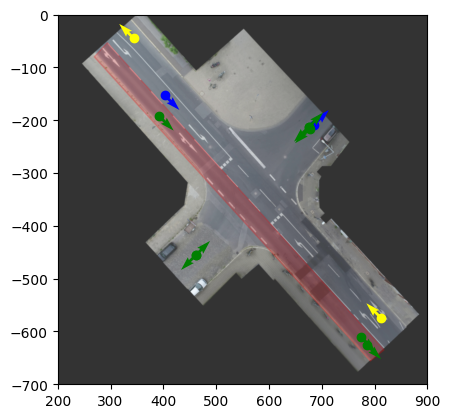

In [65]:
fig, ax = plt.subplots()
img   = mpimg.imread(background_filepath)
arrow_length = 5
j = 6
eval(f"Drive_Area_visual_{j}").plot(color = 'r', alpha = 0.2)
for i in range(len(eval(f"not_Drive_Area_visual_{j}"))):
    eval(f"not_Drive_Area_visual_{j}")[i].plot(color = 'black', alpha = 0.4)
plt.imshow(img,alpha = 0.8, extent=[0, img.shape[1], -img.shape[0], 0])
# EV1
plt.scatter(x_EV_1_initial[0]*real_to_image,x_EV_1_initial[1]*real_to_image,color='blue')
plt.quiver(x_EV_1_initial[0]*real_to_image,
           x_EV_1_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_1_initial[2]),
           arrow_length*np.sin(x_EV_1_initial[2]),
           color='blue')
plt.scatter(Param_1["RefPos"][0]*real_to_image,Param_1["RefPos"][1]*real_to_image,color='blue')
plt.quiver(Param_1["RefPos"][0]*real_to_image,
           Param_1["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_1["RefPos"][2]),
           arrow_length*np.sin(Param_1["RefPos"][2]),
           color='blue')
# EV2
plt.scatter(x_EV_2_initial[0]*real_to_image,x_EV_2_initial[1]*real_to_image,color='yellow')
plt.quiver(x_EV_2_initial[0]*real_to_image,
           x_EV_2_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_2_initial[2]),
           arrow_length*np.sin(x_EV_2_initial[2]),
           color='yellow')
plt.scatter(Param_2["RefPos"][0]*real_to_image,Param_2["RefPos"][1]*real_to_image,color='yellow')
plt.quiver(Param_2["RefPos"][0]*real_to_image,
           Param_2["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_2["RefPos"][2]),
           arrow_length*np.sin(Param_2["RefPos"][2]),
           color='yellow')
# EV3
plt.scatter(x_EV_3_initial[0]*real_to_image,x_EV_3_initial[1]*real_to_image,color='green')
plt.quiver(x_EV_3_initial[0]*real_to_image,
           x_EV_3_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_3_initial[2]),
           arrow_length*np.sin(x_EV_3_initial[2]),
           color='green')
plt.scatter(Param_3["RefPos"][0]*real_to_image,Param_3["RefPos"][1]*real_to_image,color='green')
plt.quiver(Param_3["RefPos"][0]*real_to_image,
           Param_3["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_3["RefPos"][2]),
           arrow_length*np.sin(Param_3["RefPos"][2]),
           color='green')
# EV4
plt.scatter(x_EV_4_initial[0]*real_to_image,x_EV_4_initial[1]*real_to_image,color='green')
plt.quiver(x_EV_4_initial[0]*real_to_image,
           x_EV_4_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_4_initial[2]),
           arrow_length*np.sin(x_EV_4_initial[2]),
           color='green')
plt.scatter(Param_4["RefPos"][0]*real_to_image,Param_4["RefPos"][1]*real_to_image,color='green')
plt.quiver(Param_4["RefPos"][0]*real_to_image,
           Param_4["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_4["RefPos"][2]),
           arrow_length*np.sin(Param_4["RefPos"][2]),
           color='green')
# EV5
plt.scatter(x_EV_5_initial[0]*real_to_image,x_EV_5_initial[1]*real_to_image,color='green')
plt.quiver(x_EV_5_initial[0]*real_to_image,
           x_EV_5_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_5_initial[2]),
           arrow_length*np.sin(x_EV_5_initial[2]),
           color='green')
plt.scatter(Param_5["RefPos"][0]*real_to_image,Param_5["RefPos"][1]*real_to_image,color='green')
plt.quiver(Param_5["RefPos"][0]*real_to_image,
           Param_5["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_5["RefPos"][2]),
           arrow_length*np.sin(Param_5["RefPos"][2]),
           color='green')
# EV6
plt.scatter(x_EV_6_initial[0]*real_to_image,x_EV_6_initial[1]*real_to_image,color='green')
plt.quiver(x_EV_6_initial[0]*real_to_image,
           x_EV_6_initial[1]*real_to_image,
           arrow_length*np.cos(x_EV_6_initial[2]),
           arrow_length*np.sin(x_EV_6_initial[2]),
           color='green')
plt.scatter(Param_6["RefPos"][0]*real_to_image,Param_6["RefPos"][1]*real_to_image,color='green')
plt.quiver(Param_6["RefPos"][0]*real_to_image,
           Param_6["RefPos"][1]*real_to_image,
           arrow_length*np.cos(Param_6["RefPos"][2]),
           arrow_length*np.sin(Param_6["RefPos"][2]),
           color='green')
ax.set_xlim([x_lim_0,x_lim_1])
ax.set_ylim([-y_lim_0,-y_lim_1])
plt.show()

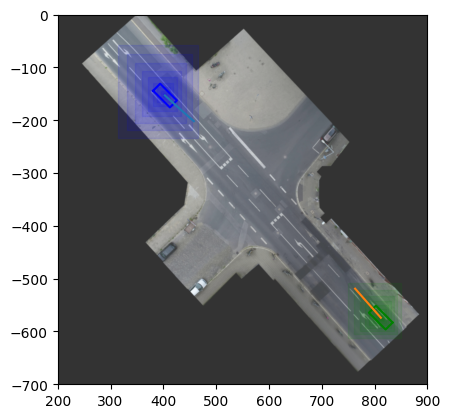

In [66]:
#test mpc
N_Sam = 70
test_polytope_1 = polytope_estimation_OR(Param_1)
State_EV_1_R     = np.zeros((5, N_Sam+1))
State_EV_1_R[:, 0] = x_EV_1_initial
X_EV_1_Planning_R = list()
X_EV_1_Planning_R.append(x_EV_1_initial[0:2].reshape(2,1))

test_polytope_2 = polytope_estimation_OR(Param_2)
State_EV_2_R     = np.zeros((5, N_Sam+1))
State_EV_2_R[:, 0] = x_EV_2_initial
X_EV_2_Planning_R = list()
X_EV_2_Planning_R.append(x_EV_2_initial[0:2].reshape(2,1))

fig, ax = plt.subplots()
img = mpimg.imread(background_filepath)

half_width_sv = real_to_image*sv_width / 2
half_length_sv = real_to_image*sv_length / 2

def draw_vehicle(ax, corners, rotation_matrix, position, color):
    rotated_corners = corners.reshape(4,2) @ rotation_matrix.T
    rotated_corners[:, 0] += position[0]
    rotated_corners[:, 1] += position[1]
    rotated_corners = np.vstack([rotated_corners, rotated_corners[0]]) 
    ax.plot(rotated_corners[:, 0], rotated_corners[:, 1], color)

corners_ev = np.array([
    [-half_length_sv, -half_width_sv],
    [half_length_sv, -half_width_sv],
    [half_length_sv, half_width_sv],
    [-half_length_sv, half_width_sv]
])

def update(frame):
    ax.clear()
    ax.imshow(img, alpha=0.8, extent=[0, img.shape[1], -img.shape[0], 0])
    ax.set_xlim([x_lim_0, x_lim_1])
    ax.set_ylim([-y_lim_0, -y_lim_1])
    
    # Calculate states and controls for EV1
    EV_1_phi = State_EV_1_R[2, frame]
    EV_1_acc = np.array([State_EV_1_R[4, frame]*np.cos(EV_1_phi),State_EV_1_R[4, frame]*np.sin(EV_1_phi)])
    EV_1_pos = np.array([State_EV_1_R[0, frame],State_EV_1_R[1, frame]])
    EV_1_vel = np.array([State_EV_1_R[3, frame]*np.cos(EV_1_phi),State_EV_1_R[3, frame]*np.sin(EV_1_phi)])
    
    # Calculate states and controls for EV2
    EV_2_phi = State_EV_2_R[2, frame]
    EV_2_acc = np.array([State_EV_2_R[4, frame]*np.cos(EV_2_phi),State_EV_2_R[4, frame]*np.sin(EV_2_phi)])
    EV_2_pos = np.array([State_EV_2_R[0, frame],State_EV_2_R[1, frame]])
    EV_2_vel = np.array([State_EV_2_R[3, frame]*np.cos(EV_2_phi),State_EV_2_R[3, frame]*np.sin(EV_2_phi)])

    # Get trajectory planning for each EV
    U_R_1, trajectory_planning_k_1, J_R_1, Occupancy_SV_aug_R1_1 = test_polytope_1.Return(
        EV_2_acc, 
        EV_2_pos, 
        EV_2_vel, 
        State_EV_1_R[:, frame])

    U_R_2, trajectory_planning_k_2, J_R_2, Occupancy_SV_aug_R1_2 = test_polytope_2.Return(
        EV_1_acc, 
        EV_1_pos, 
        EV_1_vel, 
        State_EV_2_R[:, frame])

    # Update states and planning
    X_EV_1_Planning_R.append(trajectory_planning_k_1[0:2,1].reshape(2,1))
    State_EV_1_R[:, frame + 1] = trajectory_planning_k_1[:, 1]
    X_EV_2_Planning_R.append(trajectory_planning_k_2[0:2,1].reshape(2,1))
    State_EV_2_R[:, frame + 1] = trajectory_planning_k_2[:, 1]

    # Draw vehicles
    # EV1
    rad_yaw_ev_1 = trajectory_planning_k_1[2,1]
    rotation_matrix_ev_1 = np.array([
        [np.cos(rad_yaw_ev_1), -np.sin(rad_yaw_ev_1)],
        [np.sin(rad_yaw_ev_1), np.cos(rad_yaw_ev_1)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_1, 
                [State_EV_1_R[0, frame+1]*real_to_image, State_EV_1_R[1, frame+1]*real_to_image], 'b-')

    # EV2
    rad_yaw_ev_2 = trajectory_planning_k_2[2,1]
    rotation_matrix_ev_2 = np.array([
        [np.cos(rad_yaw_ev_2), -np.sin(rad_yaw_ev_2)],
        [np.sin(rad_yaw_ev_2), np.cos(rad_yaw_ev_2)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_2, 
                [State_EV_2_R[0, frame+1]*real_to_image, State_EV_2_R[1, frame+1]*real_to_image], 'g-')


    # Plot trajectories
    ax.plot(trajectory_planning_k_1[0]*real_to_image, trajectory_planning_k_1[1]*real_to_image)
    ax.plot(trajectory_planning_k_2[0]*real_to_image, trajectory_planning_k_2[1]*real_to_image)

    for i in range(Param_1["N"]):
        occupancy = Polytope(Occupancy_SV_aug_R1_1[i].A, Occupancy_SV_aug_R1_1[i].b*real_to_image)
        occupancy.plot(color = 'g', alpha = 0.1)
        occupancy = Polytope(Occupancy_SV_aug_R1_2[i].A, Occupancy_SV_aug_R1_2[i].b*real_to_image)
        occupancy.plot(color = 'b', alpha = 0.1)

frame_length = N_Sam
ani = FuncAnimation(fig, update, frames=range(0, frame_length), interval=100, repeat=False)
#plt.show()
ani.save("../../videos/inD_multiagent/2agents_reactive_risk_simulation1.mp4", writer='ffmpeg', fps=15)



In [67]:
from IPython.display import Video

# Specify the full file path
video_path = "../../videos/inD_multiagent/2agents_reactive_risk_simulation1.mp4"

# Display the video
Video(video_path, embed=True)

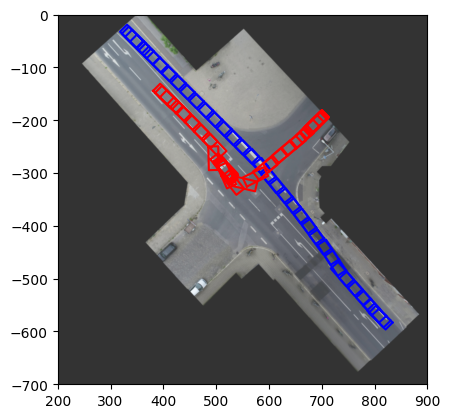

In [68]:
# Create figure for trajectory plot
fig, ax = plt.subplots()
img = mpimg.imread(background_filepath)
ax.imshow(img, alpha=0.8, extent=[0, img.shape[1], -img.shape[0], 0])
ax.set_xlim([x_lim_0, x_lim_1])
ax.set_ylim([-y_lim_0, -y_lim_1])

# Define vehicle drawing function and corners (if not already defined)
half_width_sv = real_to_image*sv_width / 2
half_length_sv = real_to_image*sv_length / 2

def draw_vehicle(ax, corners, rotation_matrix, position, color):
    rotated_corners = corners.reshape(4,2) @ rotation_matrix.T
    rotated_corners[:, 0] += position[0]
    rotated_corners[:, 1] += position[1]
    rotated_corners = np.vstack([rotated_corners, rotated_corners[0]]) 
    ax.plot(rotated_corners[:, 0], rotated_corners[:, 1], color)

corners_ev = np.array([
    [-half_length_sv, -half_width_sv],
    [half_length_sv, -half_width_sv],
    [half_length_sv, half_width_sv],
    [-half_length_sv, half_width_sv]
])

# Plot trajectories using State arrays
# ax.plot(State_EV_1_R[0, :]*real_to_image, State_EV_1_R[1, :]*real_to_image, 'b--', label='EV1 Trajectory', linewidth=2, alpha=0.7)
# ax.plot(State_EV_2_R[0, :]*real_to_image, State_EV_2_R[1, :]*real_to_image, 'g--', label='EV2 Trajectory', linewidth=2, alpha=0.7)
# ax.plot(State_EV_3_R[0, :]*real_to_image, State_EV_3_R[1, :]*real_to_image, 'r--', label='EV3 Trajectory', linewidth=2, alpha=0.7)

# Draw vehicles at regular intervals
for i in range(1, N_Sam-1, 2):  # Draw every 5th vehicle position
    # Draw EV1
    rad_yaw_ev_1 = State_EV_1_R[2, i]  # Get yaw from state
    rotation_matrix_ev_1 = np.array([
        [np.cos(rad_yaw_ev_1), -np.sin(rad_yaw_ev_1)],
        [np.sin(rad_yaw_ev_1), np.cos(rad_yaw_ev_1)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_1, 
                [State_EV_1_R[0, i]*real_to_image, State_EV_1_R[1, i]*real_to_image], 'r-')

    # Draw EV2
    rad_yaw_ev_2 = State_EV_2_R[2, i]  # Get yaw from state
    rotation_matrix_ev_2 = np.array([
        [np.cos(rad_yaw_ev_2), -np.sin(rad_yaw_ev_2)],
        [np.sin(rad_yaw_ev_2), np.cos(rad_yaw_ev_2)]
    ])
    draw_vehicle(ax, corners_ev, rotation_matrix_ev_2, 
                [State_EV_2_R[0, i]*real_to_image, State_EV_2_R[1, i]*real_to_image], 'b-')

# Add legend

# Save the trajectory plot
plt.show()

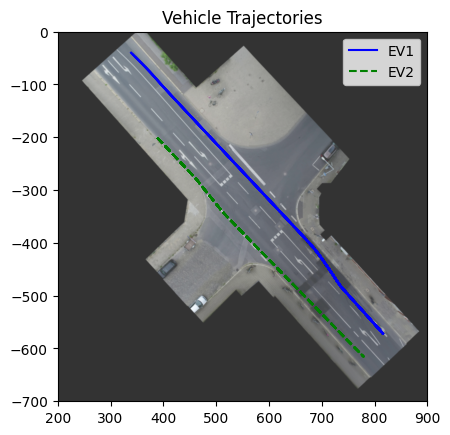

In [69]:
def plot_trajectory(i_index, j_index, background_filepath, N_Sam=70):
    # Image and plotting setup
    fig, ax = plt.subplots()
    img = mpimg.imread(background_filepath)
    ax.imshow(img, alpha=0.8, extent=[0, img.shape[1], -img.shape[0], 0])
    ax.set_xlim([x_lim_0, x_lim_1])
    ax.set_ylim([-y_lim_0, -y_lim_1])

    perturb_i = np.array([
        np.random.uniform(-1.0, 1.0),  # x position
        np.random.uniform(-1.0, 1.0),  # y position
        np.random.uniform(-0.1, 0.1),  # heading
        np.random.uniform(-0.5, 0.5),  # velocity
        np.random.uniform(-0.2, 0.2)   # acceleration
    ])
    
    perturb_j = np.array([
        np.random.uniform(-1.0, 1.0),  # x position
        np.random.uniform(-1.0, 1.0),  # y position
        np.random.uniform(-0.1, 0.1),  # heading
        np.random.uniform(-0.5, 0.5),  # velocity
        np.random.uniform(-0.2, 0.2)   # acceleration
    ])

    # Vehicle dimensions
    half_width_sv = real_to_image*sv_width / 2
    half_length_sv = real_to_image*sv_length / 2
    corners_ev = np.array([
        [-half_length_sv, -half_width_sv],
        [half_length_sv, -half_width_sv],
        [half_length_sv, half_width_sv],
        [-half_length_sv, half_width_sv]
    ])

    # Initialize states
    State_EV_1_R = np.zeros((5, N_Sam+1))
    State_EV_1_R[:, 0] = eval(f"x_EV_{i_index}_initial") + perturb_i
    
    State_EV_2_R = np.zeros((5, N_Sam+1))
    State_EV_2_R[:, 0] = eval(f"x_EV_{j_index}_initial") + perturb_j

    test_polytope_1 = polytope_estimation_OR(eval(f"Param_{i_index}"))
    test_polytope_2 = polytope_estimation_OR(eval(f"Param_{j_index}"))

    # Simulate trajectory
    for frame in range(N_Sam):
        # Calculate states for EV1
        EV_1_phi = State_EV_1_R[2, frame]
        EV_1_acc = np.array([State_EV_1_R[4, frame]*np.cos(EV_1_phi), 
                            State_EV_1_R[4, frame]*np.sin(EV_1_phi)])
        EV_1_pos = np.array([State_EV_1_R[0, frame], State_EV_1_R[1, frame]])
        EV_1_vel = np.array([State_EV_1_R[3, frame]*np.cos(EV_1_phi),
                            State_EV_1_R[3, frame]*np.sin(EV_1_phi)])

        # Calculate states for EV2
        EV_2_phi = State_EV_2_R[2, frame]
        EV_2_acc = np.array([State_EV_2_R[4, frame]*np.cos(EV_2_phi),
                            State_EV_2_R[4, frame]*np.sin(EV_2_phi)])
        EV_2_pos = np.array([State_EV_2_R[0, frame], State_EV_2_R[1, frame]])
        EV_2_vel = np.array([State_EV_2_R[3, frame]*np.cos(EV_2_phi),
                            State_EV_2_R[3, frame]*np.sin(EV_2_phi)])

        # Get trajectory planning
        U_R_1, trajectory_planning_k_1, J_R_1, Occupancy_SV_aug_R1_1 = test_polytope_1.Return(
            EV_2_acc, EV_2_pos, EV_2_vel, State_EV_1_R[:, frame])
        
        U_R_2, trajectory_planning_k_2, J_R_2, Occupancy_SV_aug_R1_2 = test_polytope_2.Return(
            EV_1_acc, EV_1_pos, EV_1_vel, State_EV_2_R[:, frame])

        # Update states
        State_EV_1_R[:, frame + 1] = trajectory_planning_k_1[:, 1]
        State_EV_2_R[:, frame + 1] = trajectory_planning_k_2[:, 1]

        # Plot trajectories
        if frame % 2 == 0:
            ax.plot(State_EV_1_R[0, :frame+2]*real_to_image, 
                State_EV_1_R[1, :frame+2]*real_to_image, 
                'b-', label='EV1' if frame == 0 else "")
            ax.plot(State_EV_2_R[0, :frame+2]*real_to_image, 
                State_EV_2_R[1, :frame+2]*real_to_image, 
                'g--', label='EV2' if frame == 0 else "")

            # Plot occupancy sets
            # for i in range(Param_1["N"]):
            #     occupancy = Polytope(Occupancy_SV_aug_R1_1[i].A, Occupancy_SV_aug_R1_1[i].b*real_to_image)
            #     occupancy.plot(color='g', alpha=0.1)
            #     occupancy = Polytope(Occupancy_SV_aug_R1_2[i].A, Occupancy_SV_aug_R1_2[i].b*real_to_image)
            #     occupancy.plot(color='b', alpha=0.1)

    ax.legend()
    ax.set_title('Vehicle Trajectories')
    plt.show()

# Run the simulation
plot_trajectory(2, 6, background_filepath)

In [70]:
def generate_random_perturbation():
    """Generate random perturbations for vehicle state"""
    return np.array([
        np.random.uniform(-5.0, 5.0),  # x position
        np.random.uniform(-5.0, 5.0),  # y position
        np.random.uniform(-0.1, 0.1),  # heading
        np.random.uniform(-2, 2),  # velocity
        np.random.uniform(-2, 2)   # acceleration
    ])

def run_single_simulation(i_index, j_index, background_filepath, N_Sam=70):
    """Run a single simulation with random perturbations"""
    # Image and plotting setup
    fig, ax = plt.subplots()
    img = mpimg.imread(background_filepath)
    ax.imshow(img, alpha=0.8, extent=[0, img.shape[1], -img.shape[0], 0])
    ax.set_xlim([x_lim_0, x_lim_1])
    ax.set_ylim([-y_lim_0, -y_lim_1])

    # Add random perturbations
    perturb_i = generate_random_perturbation()
    perturb_j = generate_random_perturbation()

    # Initialize states with perturbations
    State_EV_1_R = np.zeros((5, N_Sam+1))
    State_EV_1_R[:, 0] = eval(f"x_EV_{i_index}_initial") + perturb_i
    
    State_EV_2_R = np.zeros((5, N_Sam+1))
    State_EV_2_R[:, 0] = eval(f"x_EV_{j_index}_initial") + perturb_j

    test_polytope_1 = polytope_estimation_OR(eval(f"Param_{i_index}"))
    test_polytope_2 = polytope_estimation_OR(eval(f"Param_{j_index}"))

    min_distance = float('inf')
    success = False
    completion_time = N_Sam

    # Define goal positions and tolerance
    goal_1 = eval(f"Param_{i_index}")["RefPos"]
    goal_2 = eval(f"Param_{j_index}")["RefPos"]
    position_tolerance = 10.0  # meters
    
    # Simulate trajectory
    for frame in range(N_Sam):
        # Calculate states for EV1
        EV_1_phi = State_EV_1_R[2, frame]
        EV_1_acc = np.array([State_EV_1_R[4, frame]*np.cos(EV_1_phi), 
                            State_EV_1_R[4, frame]*np.sin(EV_1_phi)])
        EV_1_pos = np.array([State_EV_1_R[0, frame], State_EV_1_R[1, frame]])
        EV_1_vel = np.array([State_EV_1_R[3, frame]*np.cos(EV_1_phi),
                            State_EV_1_R[3, frame]*np.sin(EV_1_phi)])

        # Calculate states for EV2
        EV_2_phi = State_EV_2_R[2, frame]
        EV_2_acc = np.array([State_EV_2_R[4, frame]*np.cos(EV_2_phi),
                            State_EV_2_R[4, frame]*np.sin(EV_2_phi)])
        EV_2_pos = np.array([State_EV_2_R[0, frame], State_EV_2_R[1, frame]])
        EV_2_vel = np.array([State_EV_2_R[3, frame]*np.cos(EV_2_phi),
                            State_EV_2_R[3, frame]*np.sin(EV_2_phi)])

        # Calculate distance between vehicles
        distance = np.linalg.norm(EV_2_pos - EV_1_pos)
        min_distance = min(min_distance, distance)

        # Check if both vehicles have reached their goals
        EV1_at_goal = (np.linalg.norm(EV_1_pos - goal_1[0:2]) < position_tolerance)
        EV2_at_goal = (np.linalg.norm(EV_2_pos - goal_2[0:2]) < position_tolerance)

        if EV1_at_goal and EV2_at_goal:
            success = True
            completion_time = frame
            break

        # Get trajectory planning
        U_R_1, trajectory_planning_k_1, J_R_1, Occupancy_SV_aug_R1_1 = test_polytope_1.Return(
            EV_2_acc, EV_2_pos, EV_2_vel, State_EV_1_R[:, frame])
        
        U_R_2, trajectory_planning_k_2, J_R_2, Occupancy_SV_aug_R1_2 = test_polytope_2.Return(
            EV_1_acc, EV_1_pos, EV_1_vel, State_EV_2_R[:, frame])

        # Update states
        State_EV_1_R[:, frame + 1] = trajectory_planning_k_1[:, 1]
        State_EV_2_R[:, frame + 1] = trajectory_planning_k_2[:, 1]

    plt.close()

    return {
        'success': success,
        'min_distance': min_distance,
        'completion_time': completion_time,
        'trajectory_1': State_EV_1_R,
        'trajectory_2': State_EV_2_R,
        'indices': (i_index, j_index)
    }

def run_monte_carlo_simulation(background_filepath, num_trials=100, N_Sam=70):
    """Run multiple Monte Carlo trials with random vehicle pairs"""
    results = {
        'success_count': 0,
        'min_distances': [],
        'completion_times': [],
        'trajectories_1': [],
        'trajectories_2': [],
        'failed_trials': 0,
        'vehicle_pairs': []  # Store which pairs were used
    }

    pbar = tqdm(range(num_trials), desc='Running Monte Carlo Trials')
    
    for trial in pbar:
        max_retries = 5
        retry_count = 0
        success = False
        
        while retry_count < max_retries and not success:
            try:
                # Randomly choose two different indices between 1 and 5
                available_indices = list(range(1, 7))  # [1, 2, 3, 4, 5]
                i_index = np.random.choice(available_indices)
                available_indices.remove(i_index)
                j_index = np.random.choice(available_indices)
                
                trial_results = run_single_simulation(i_index, j_index, background_filepath, N_Sam)
                
                results['min_distances'].append(trial_results['min_distance'])
                results['completion_times'].append(trial_results['completion_time'])
                results['trajectories_1'].append(trial_results['trajectory_1'])
                results['trajectories_2'].append(trial_results['trajectory_2'])
                results['vehicle_pairs'].append((i_index, j_index))
                
                if trial_results['success']:
                    results['success_count'] += 1
                
                success = True
                
            except Exception as e:
                retry_count += 1
                if retry_count < max_retries:
                    print(f"\nTrial {trial} failed (attempt {retry_count}/{max_retries}). Error: {str(e)}")
                else:
                    print(f"\nTrial {trial} failed after {max_retries} attempts.")
                    results['failed_trials'] += 1
        
        pbar.set_postfix({
            'Success Rate': f"{(results['success_count']/(trial+1))*100:.1f}%",
            'Failed Trials': results['failed_trials']
        })

    return results

def analyze_monte_carlo_results(results, num_trials):
    """Analyze and visualize Monte Carlo simulation results"""
    # Calculate statistics
    success_rate = results['success_count'] / num_trials * 100
    avg_min_distance = np.mean(results['min_distances'])
    std_min_distance = np.std(results['min_distances'])
    
    completion_times = [t for t in results['completion_times'] if t < results['completion_times'][0]]
    avg_completion_time = np.mean(completion_times) if completion_times else None

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot minimum distances histogram
    ax1.hist(results['min_distances'], bins=30)
    ax1.set_title('Minimum Distances Between Vehicles')
    ax1.set_xlabel('Distance (m)')
    ax1.set_ylabel('Number of Trials')
    
    # Plot completion times histogram
    if completion_times:
        ax2.hist(completion_times, bins=30)
        ax2.set_title('Completion Times')
        ax2.set_xlabel('Time steps')
        ax2.set_ylabel('Number of Trials')
    else:
        ax2.text(0.5, 0.5, 'No successful completions', ha='center', va='center')
    
    # Plot vehicle pair frequencies
    pair_counts = {}
    for i, j in results['vehicle_pairs']:
        pair_counts[f"EV{i}-EV{j}"] = pair_counts.get(f"EV{i}-EV{j}", 0) + 1
    
    pairs = list(pair_counts.keys())
    counts = list(pair_counts.values())
    
    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\nMonte Carlo Simulation Results ({num_trials} trials):")
    print(f"Success Rate: {success_rate:.2f}%")
    print(f"Average Minimum Distance: {avg_min_distance:.2f} m")
    print(f"Std Dev of Minimum Distance: {std_min_distance:.2f} m")
    if avg_completion_time is not None:
        print(f"Average Completion Time (successful trials): {avg_completion_time:.2f} steps")
    else:
        print("No successful completions")

def plot_best_worst_trajectories(results):
    """Plot the trajectories with best and worst minimum distances"""
    min_distances = np.array(results['min_distances'])
    best_idx = np.argmax(min_distances)
    worst_idx = np.argmin(min_distances)
    
    # Plot best trajectory
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Best trajectory
    i_best, j_best = results['vehicle_pairs'][best_idx]
    traj1_best = results['trajectories_1'][best_idx]
    traj2_best = results['trajectories_2'][best_idx]
    
    ax1.plot(traj1_best[0, :]*real_to_image, traj1_best[1, :]*real_to_image, 'b-', label=f'EV{i_best}')
    ax1.plot(traj2_best[0, :]*real_to_image, traj2_best[1, :]*real_to_image, 'g--', label=f'EV{j_best}')
    ax1.set_title(f'Best Case (Min Distance: {min_distances[best_idx]:.2f}m)')
    ax1.legend()
    
    # Worst trajectory
    i_worst, j_worst = results['vehicle_pairs'][worst_idx]
    traj1_worst = results['trajectories_1'][worst_idx]
    traj2_worst = results['trajectories_2'][worst_idx]
    
    ax2.plot(traj1_worst[0, :]*real_to_image, traj1_worst[1, :]*real_to_image, 'b-', label=f'EV{i_worst}')
    ax2.plot(traj2_worst[0, :]*real_to_image, traj2_worst[1, :]*real_to_image, 'g--', label=f'EV{j_worst}')
    ax2.set_title(f'Worst Case (Min Distance: {min_distances[worst_idx]:.2f}m)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

def main():
    """Main function to run the Monte Carlo simulation"""
    # Run simulation
    results = run_monte_carlo_simulation(background_filepath, num_trials=100)
    
    # Analyze results
    analyze_monte_carlo_results(results, 100)
    
    # Plot best and worst trajectories
    plot_best_worst_trajectories(results)

# if __name__ == "__main__":
#     main()